## カラーバーのカスタマイズ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

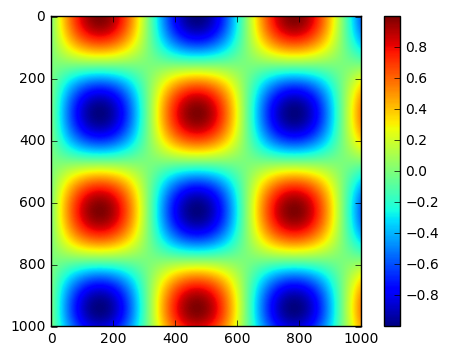

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

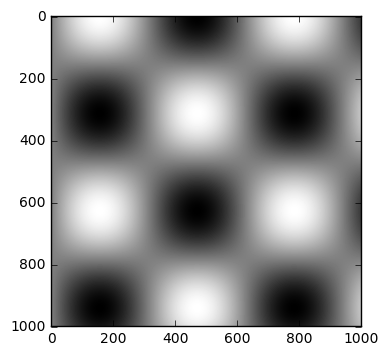

In [4]:
plt.imshow(I, cmap='gray')

### カラーマップの選択
* 可視化における色の選択についての記事：
 [「より良い図のための１０の簡単なルール」](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
* [Matplotlibのオンラインドキュメント](https://matplotlib.org/3.0.0/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py)

カラーマップの３つのカテゴリ　<br>
* **順次的カラーマップ**<br>段階的に変化する一連の色で構成される。（例：binary, viridis）
* **発散的カラーマップ**<br>平均からの正および負の偏差を示す２つの異なる色から構成される。（例：RdBu, puOr）
* **定性的カラーマップ**<br>特定の色の変化を伴わない混合色で構成される（例：rainbow, jet）

In [5]:
from matplotlib.colors import LinearSegmentedColormap

In [16]:
def grayscale_cmap(cmap):
    # 渡されたカラーマップのグレースケール版を返す
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [17]:
def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

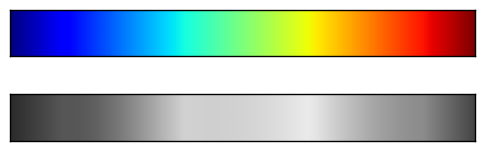

In [18]:
# Jetカラーマップと不均一な輝度スケール
view_colormap('jet')

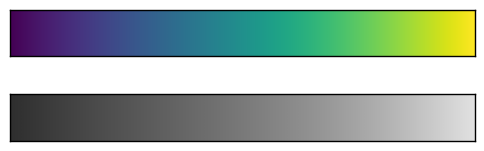

In [19]:
view_colormap('viridis')

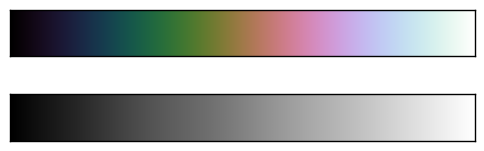

In [20]:
view_colormap('cubehelix')

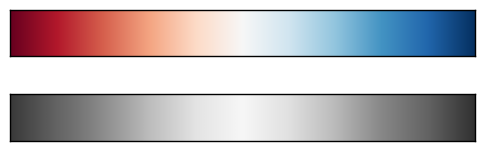

In [21]:
view_colormap('RdBu')

### 色の範囲制限と拡張

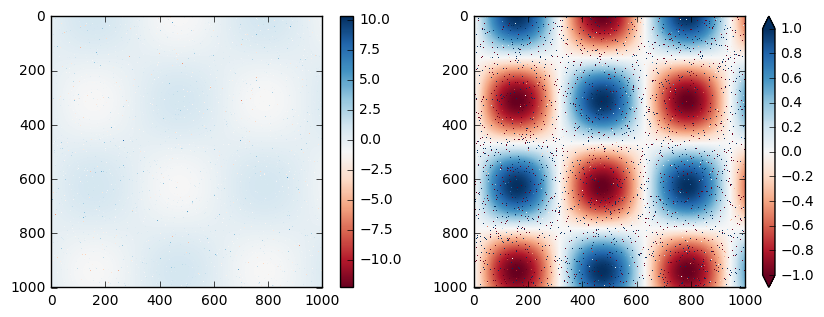

In [22]:
# 画像のピクセルに１％のノイズを乗せる
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

### 離散的カラーバー
plt.cm.get_cmap()関数にカラーマップの名前と目的のビンの数を渡すと離散値を表現できる

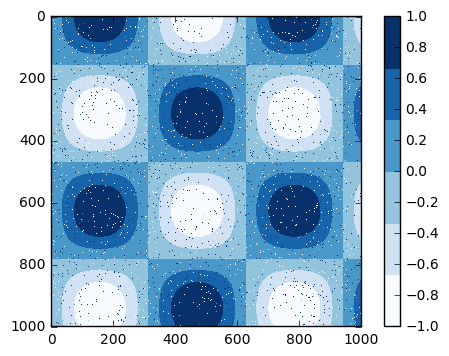

In [23]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## 事例：手書きの数字


In [24]:
from sklearn.datasets import load_digits

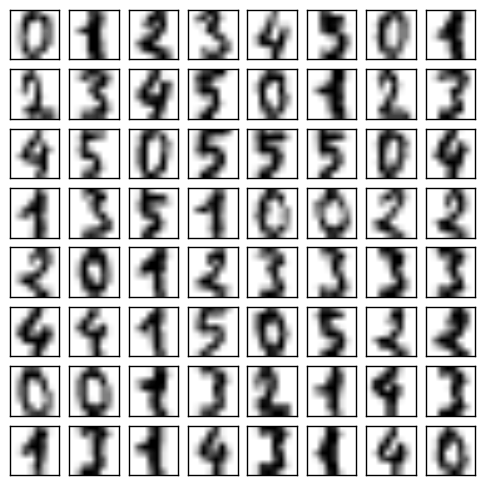

In [26]:
# 0から５までの数字イメージをダウンロードし、いくつかを表示する
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [27]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection= iso.fit_transform(digits.data)

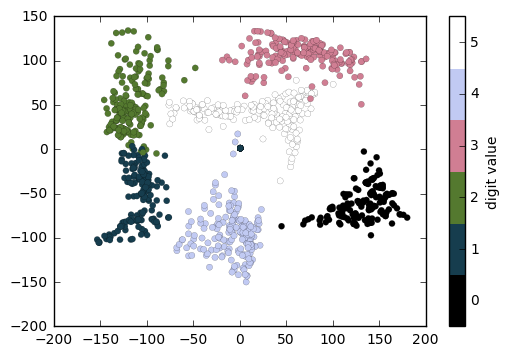

In [28]:
# 結果のプロット
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
                   c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)